In [7]:
%pip install pyod
import os
import numpy as np
from pyod.models import hbos
from pyod.utils.data import evaluate_print
from sklearn.metrics import confusion_matrix,cohen_kappa_score,f1_score
from scipy import signal
import matplotlib.pyplot as plt
import pickle
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.3-py3-none-any.whl size=200466 sha256=d1ef1813548e416fa4c7ec4ad625aad2eeb13a563809b9a7a3549dcd421931fb
  Stored in directory: /root/.cache/pip/wheels/60/83/d0/cc2d3c992154f659eb68a8710537da31f50db28ff65a252189
Successfully built pyod


In [8]:
#####
# Trial or epoch = eeg segment
#####

channels = 32
seconds = 0.5    # Size of each segment we want
fs = 256.0         # Dtaset eeg sampling rate
data_portion = 1
save_model = False

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
import pandas as pd

dataset_path = "/content/drive/My Drive/features_raw.csv"
df = pd.read_csv(dataset_path)

df.head()


,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Unnamed: 32
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618,NaN
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093,NaN
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537,NaN
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060,NaN
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816,NaN


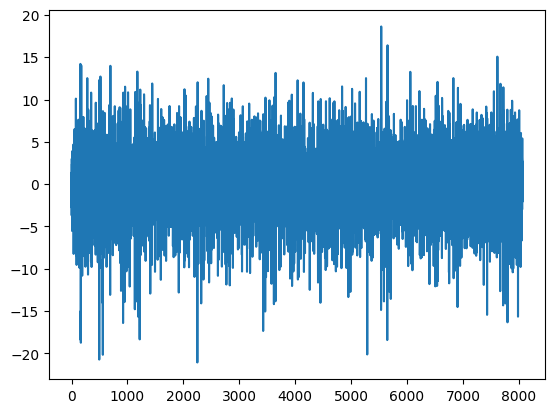

In [11]:
plt.plot(df['Fp1'])


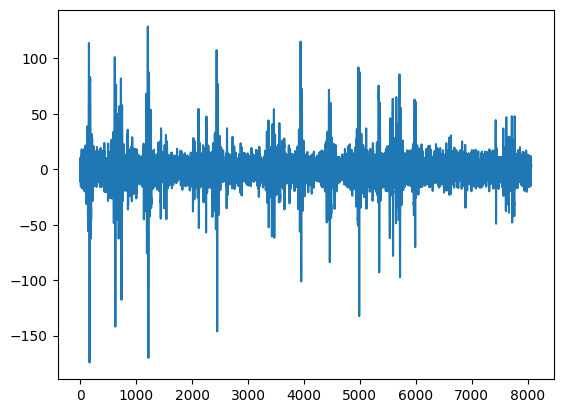

In [12]:
plt.plot(df['AF3'])


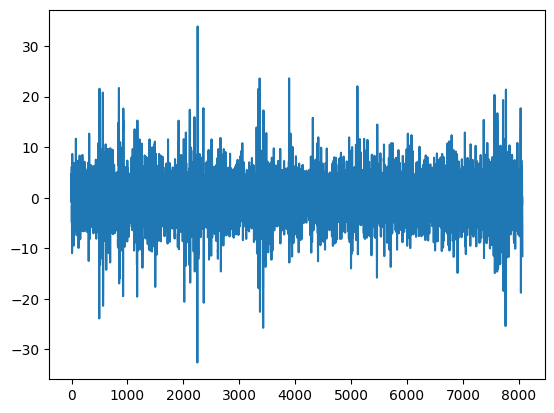

In [13]:
plt.plot(df['F3'])


In [14]:
class EEGDataset2:
    def __init__(self, train_csv, seconds=0.500, fs=256, data_portion=1, normalize=True, isolated_channels=False):
        assert data_portion > 0.0 and data_portion <= 1, 'data_portion should be > 0 and <= 1'

        self.isolated_channels = isolated_channels
        self.normalize = normalize
        self.train_csv = train_csv
        self.seconds = seconds
        self.fs = fs
        self.data_portion = data_portion

    def get_data(self):
        df = pd.read_csv(self.train_csv)
        array_size = int(self.seconds * self.fs)
        # Dataset shape is: [data x channels]
        # we want shape: [segments x features]

        if self.normalize:
            df = (df - df.mean()) / df.std()

        if self.isolated_channels:
            channels = []
            for channel in df.columns[0:32]:
                isolated_channel = []
                for i in range(int(len(df) / array_size)):
                    isolated_channel.append(df[channel][i*array_size:(i+1)*array_size].to_numpy())
                channels.append(np.array(isolated_channel))
            return np.array(channels)

        dataset = []

        for channel in df.columns[0:32]:
            for i in range(int(len(df) / array_size)):
                dataset.append(df[channel][i*array_size:(i+1)*array_size].to_numpy())

        return np.array(dataset)

In [15]:
train_csv = dataset_path
eegDataset = EEGDataset2(train_csv, seconds, fs, data_portion, normalize=True)

train_dataset = eegDataset.get_data()

In [16]:
train_dataset.shape


(2016, 128)

In [17]:
clf = hbos.HBOS(n_bins=17, alpha=0.07, tol=0.5,contamination=.15)
clf.fit(train_dataset)

print("="*20)
print("TRAINING THE MODEL")

TRAINING THE MODEL


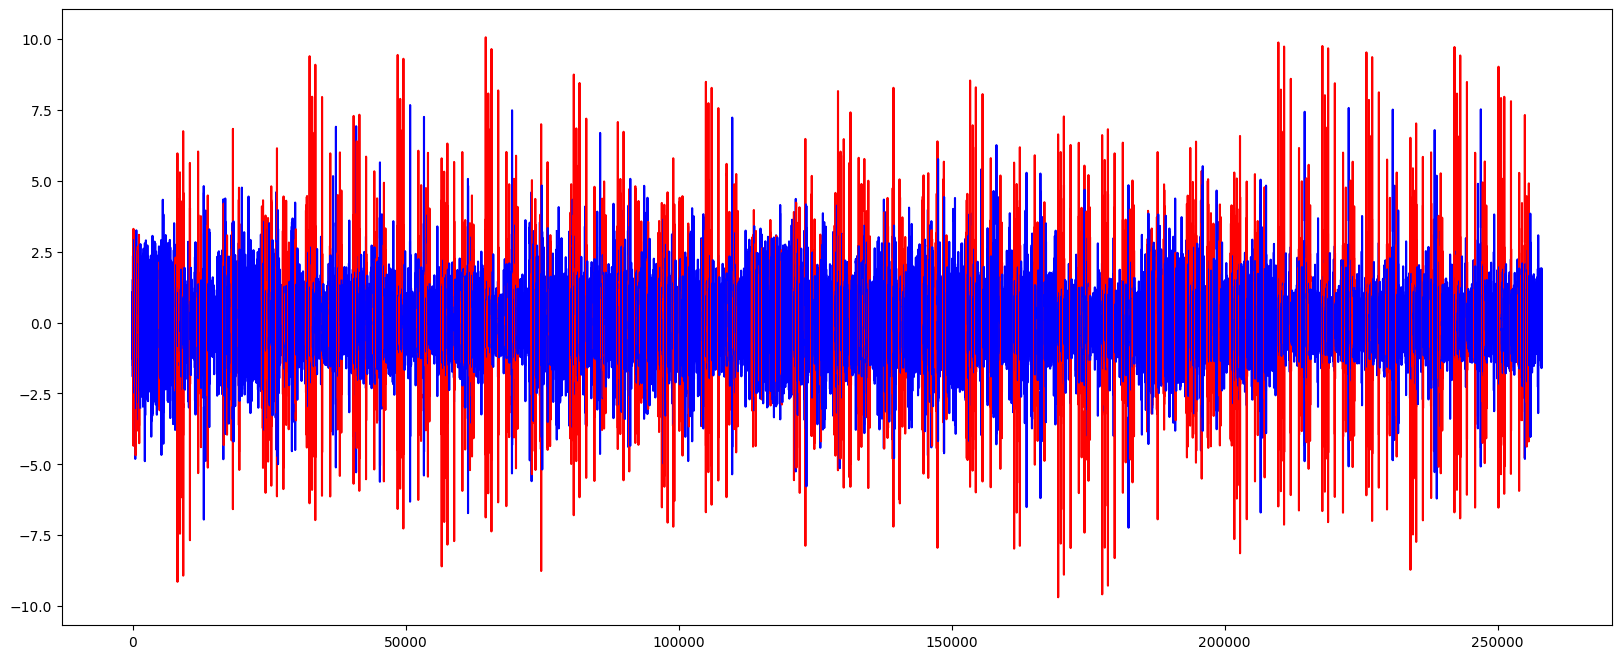

In [18]:
pred = clf.predict(train_dataset)

for i in range(len(pred)):
    plt.rcParams["figure.figsize"] = (20,8)

    if pred[i] == 1: plt.plot(range(128*i,128*(i+1)), train_dataset[i], color='red')
    else: plt.plot(range(128*i,128*(i+1)), train_dataset[i], color='b')

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()
from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import seaborn as sns


import os

In [20]:
data = pd.read_csv("/content/drive/My Drive/emotions.csv")


In [16]:
len(data)


2132

In [21]:
#Seprarting Positive,Neagtive and Neutral dataframes for plortting
pos = data.loc[data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

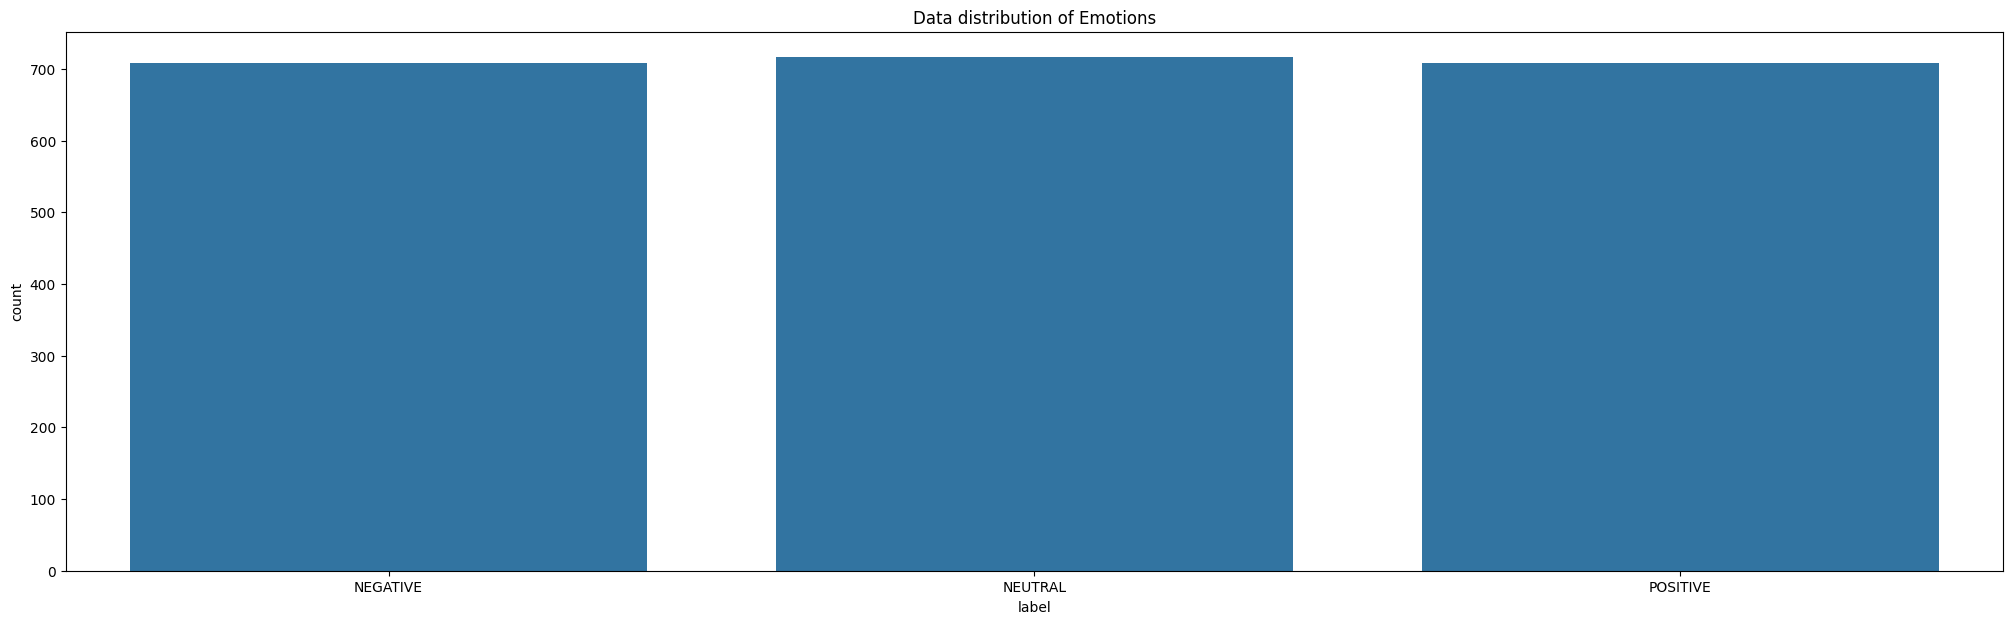

In [22]:
#plottintg Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=data)
plt.show()

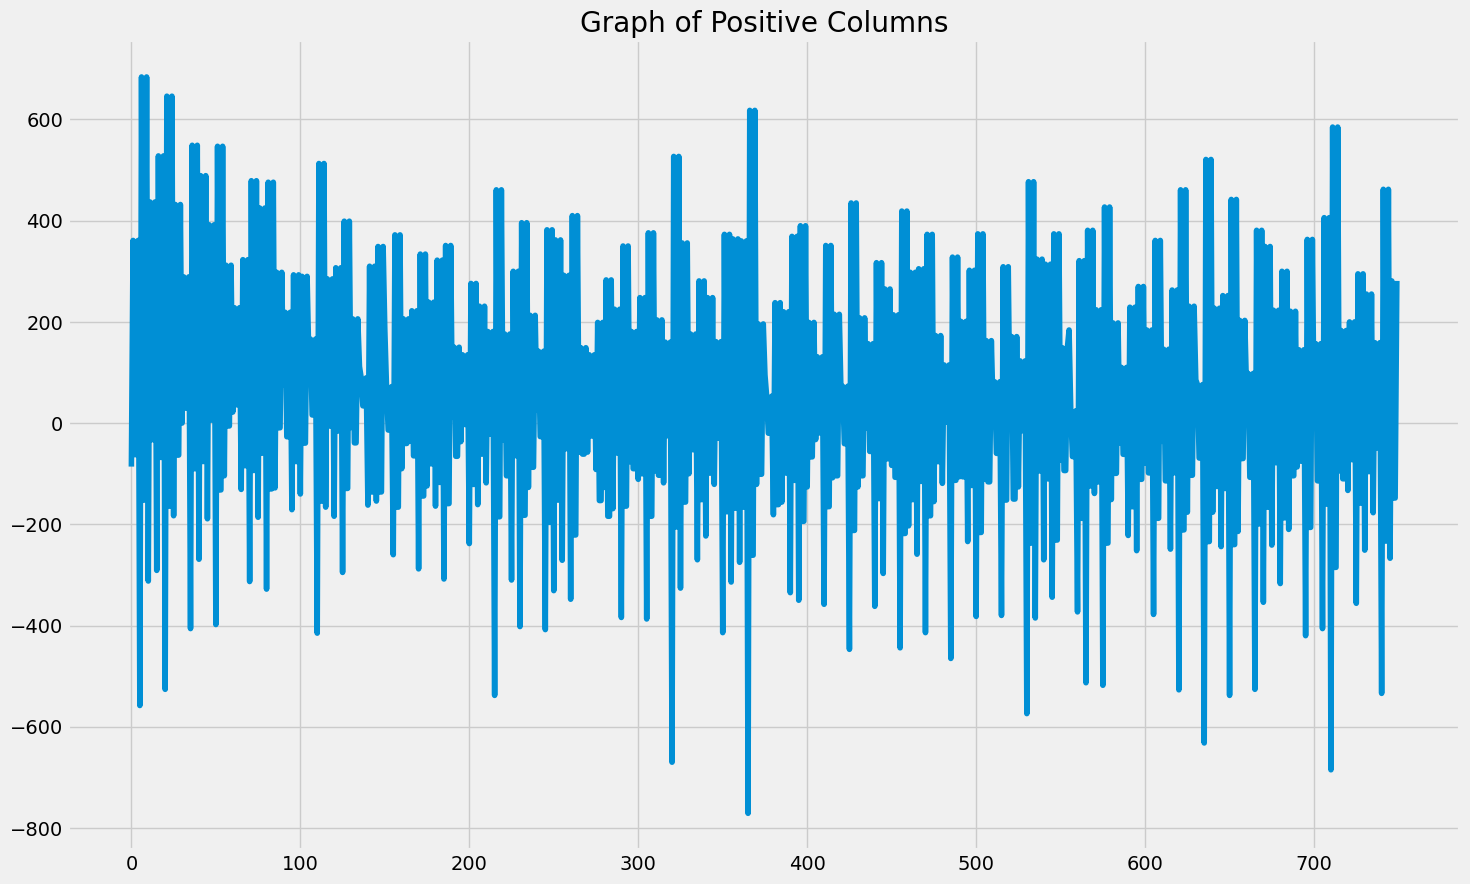

In [23]:
#Plotting Positive DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_pos)
plt.title("Graph of Positive Columns")
plt.show()

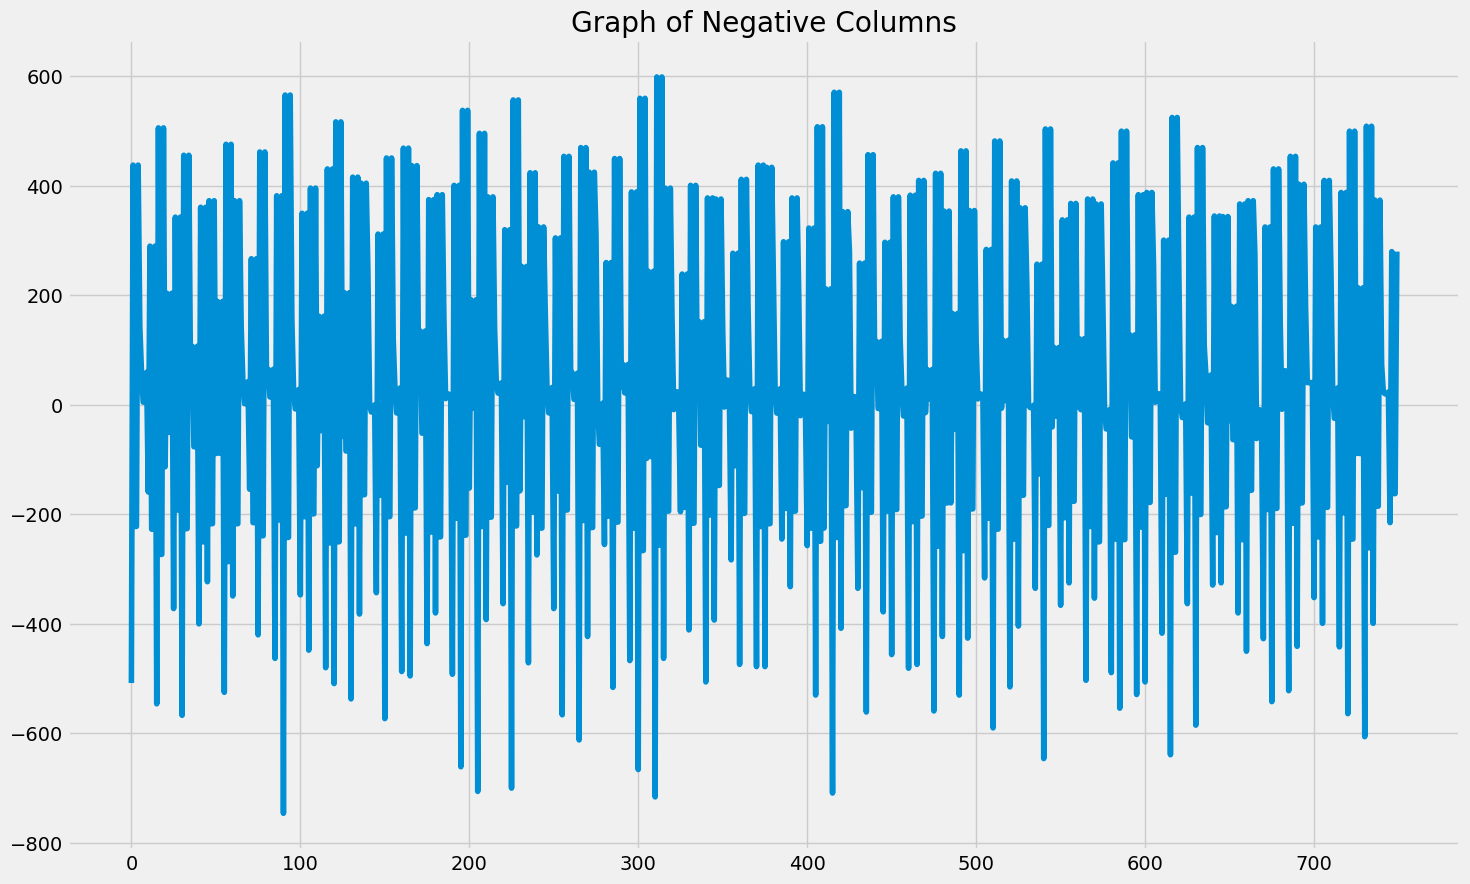

In [24]:
#Plotting Negative DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neg)), sample_neg)
plt.title("Graph of Negative Columns")
plt.show()

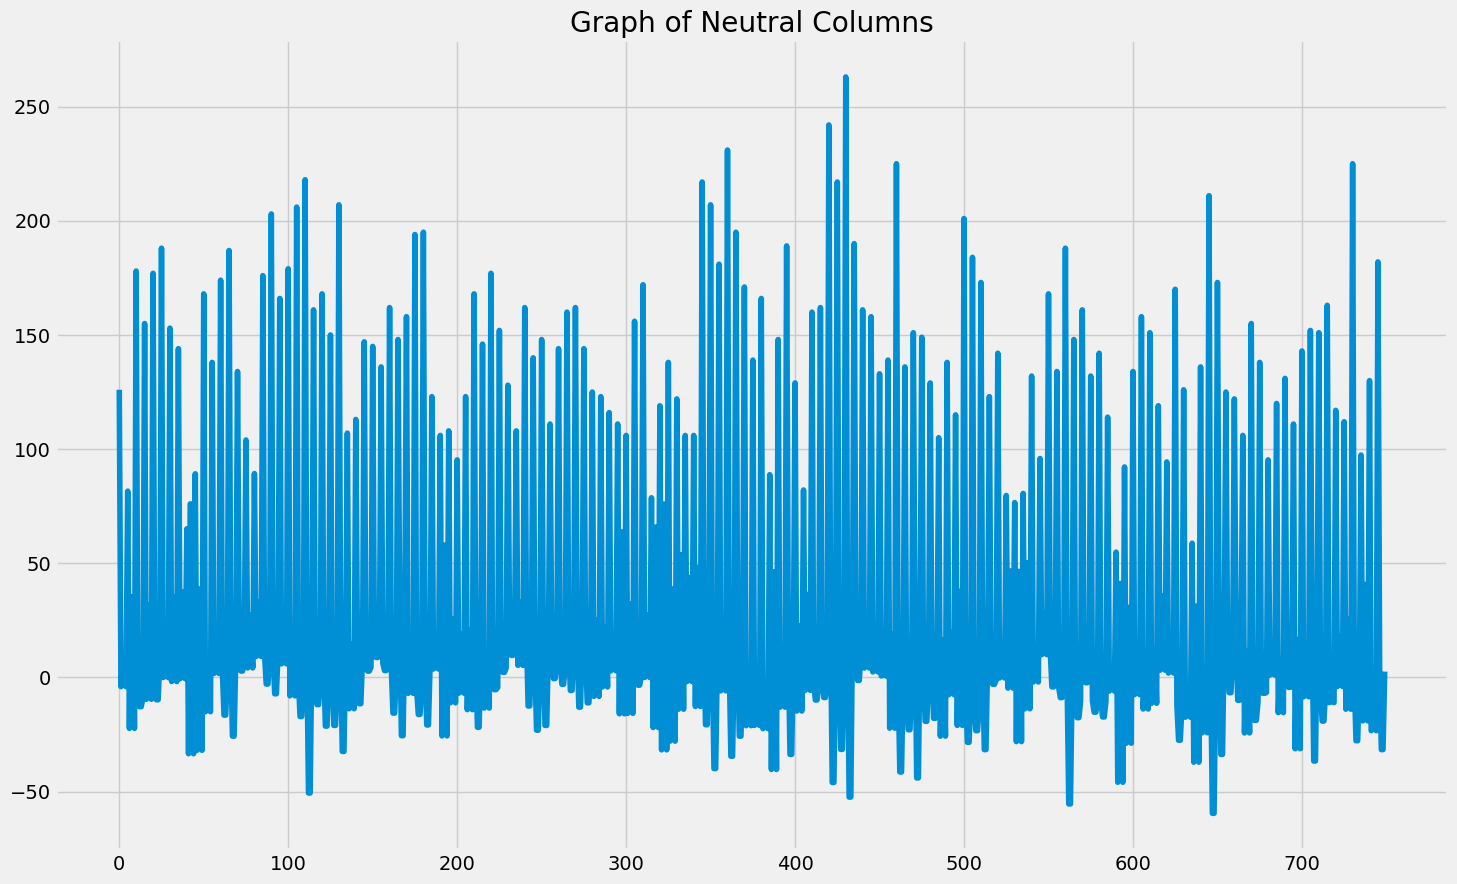

In [25]:
#Plotting Neutral DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()

In [26]:
def Transform_data(data):
    #Encoding Lables into numbers
    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    data_encoded = data.replace(encoding_data)
    #getting brain signals into x variable
    x=data_encoded.drop(["label"]  ,axis=1)
    #getting labels into y variable
    y = data_encoded.loc[:,'label'].values
    scaler = StandardScaler()
    #scaling Brain Signals
    scaler.fit(x)
    X = scaler.transform(x)
    #One hot encoding Labels
    Y = to_categorical(y)
    return X,Y

In [27]:
X,Y = Transform_data(data)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

<ipython-input-26-b52220c76a2b>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data.replace(encoding_data)


In [24]:
x_train.shape[0]


1705

In [25]:
import tensorflow as tf

def create_model(x_train):
    # Input layer of model for brain signals (assuming x_train has shape (batch_size, features))
    inputs = tf.keras.Input(shape=(x_train.shape[1],))  # Shape: (features,)

    # Reshaping the input to add a time dimension (for LSTM/GRU)
    # Here we assume time_steps = 1 (each feature as a time step)
    reshaped = tf.keras.layers.Reshape((x_train.shape[1], 1))(inputs)  # Shape: (batch_size, features, 1)

    # GRU layer (You can replace it with LSTM if needed)
    gru = tf.keras.layers.GRU(256, return_sequences=True)(reshaped)

    # Flatten GRU layer output into a 1D vector
    flatten = tf.keras.layers.Flatten()(gru)

    # Output layer of the model with softmax activation for classification (e.g., 3 classes)
    outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Print model summary
    model.summary()

    return model


In [26]:
# Create the model
lstmmodel = create_model(x_train)

# Compile the model
lstmmodel.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2548)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 2548, 256)           │         198,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 652288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │       1,956,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,779 (8.22 MB)

 Trainable params: 2,155,779 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
df.head()

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Unnamed: 32
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618,NaN
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093,NaN
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537,NaN
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060,NaN
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816,NaN


In [28]:
#Training and Evaluting model
history = lstmmodel.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = lstmmodel.evaluate(x_test, y_test)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - accuracy: 0.8088 - loss: 0.7220 - val_accuracy: 0.9240 - val_loss: 0.3662
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9182 - loss: 0.2334 - val_accuracy: 0.9298 - val_loss: 0.1998
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9557 - loss: 0.1206 - val_accuracy: 0.9532 - val_loss: 0.1441
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9599 - loss: 0.1066 - val_accuracy: 0.9591 - val_loss: 0.1478
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.9802 - loss: 0.0542 - val_accuracy: 0.9240 - val_loss: 0.1992
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9651 - loss: 0.0877 - val_accuracy: 0.9474 - val_loss: 0.2546
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9773 - loss: 0.0641 - val_accuracy: 0.9649 - val_loss: 0.1811
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9958 - loss: 0.0210 - val_accurac

In [29]:
print(f"Loss on testing: {loss*100}",f"\nAccuracy on Training: {acc*100}")


Loss on testing: 15.594758093357086 
Accuracy on Training: 96.48711681365967


In [30]:
pred  = lstmmodel.predict(x_test)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [31]:
#Creation of Function of Confusion Matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.label.unique()))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred1 = np.argmax(pred,axis=1)

In [33]:
#inversing the one hot encoding
y_test1 =   np.argmax(y_test,axis=1)

In [34]:
#printing first 10 Actual and predicted outputs of Test brain signals
print("Predicted:  ",pred1[:10])
print("\n")
print("Actual: ",y_test1[:10])

Predicted:   [1 1 1 2 1 1 2 1 2 1]


Actual:  [1 1 1 2 1 1 2 1 2 1]


Confusion matrix, without normalization
[[150   3   0]
 [  2 130  10]
 [  0   0 132]]


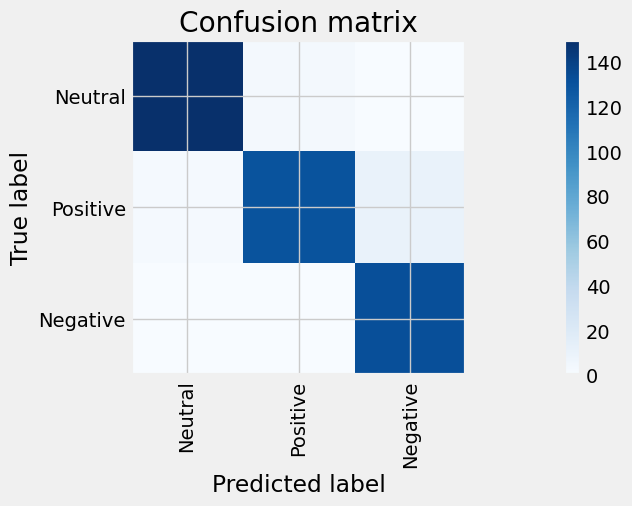

In [35]:
#Plotting Confusion matrix of Lstm Model
cm = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
plot_confusion_matrix(cm,["Neutral","Positive","Negative"])

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

names1 = ["Neutral","Positive","Negative"]



*		Classification Report GNB:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78       153
           1       0.46      0.30      0.36       142
           2       0.81      0.66      0.73       132

    accuracy                           0.65       427
   macro avg       0.64      0.64      0.62       427
weighted avg       0.64      0.65      0.62       427


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       153
           1       0.98      0.89      0.94       142
           2       0.94      0.99      0.97       132

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427


*		Classification Report LR:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.98      0.94 

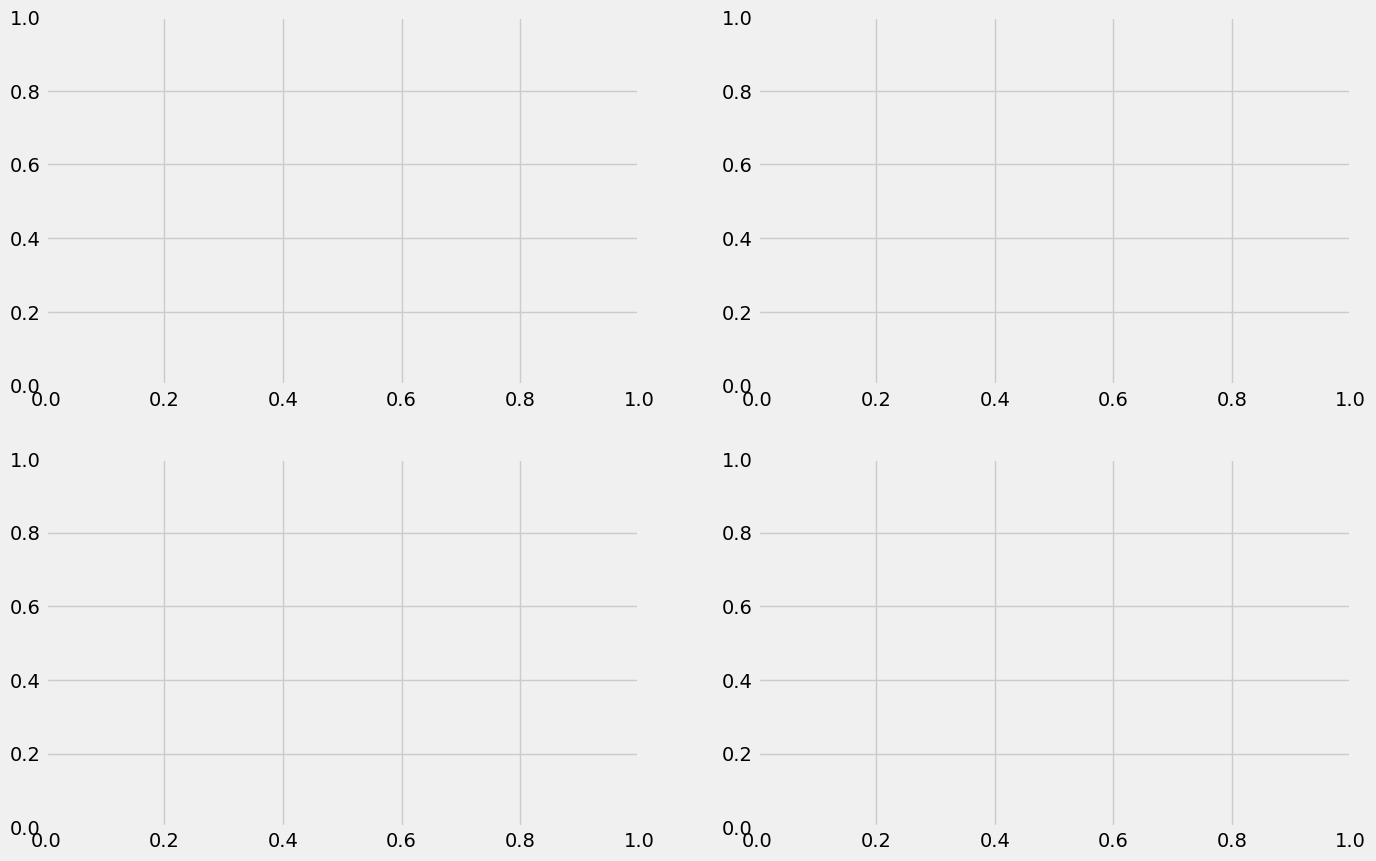

In [37]:

#Training our dataset on different Classifiers to check the results and creating their classification reports
#NAves Bayes Clssifier
Classifier_gnb = GaussianNB().fit(x_train, np.argmax(y_train,axis=1))
pred_gnb = Classifier_gnb.predict(x_test)
print ('\n*\t\tClassification Report GNB:\n', classification_report(np.argmax(y_test,axis=1), pred_gnb))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_gnb)
### Support Vector Machine

Classifier_svm = svm.SVC(kernel='linear').fit(x_train, np.argmax(y_train,axis=1))
pred_svm = Classifier_svm.predict(x_test)
print ('\n*\t\tClassification Report SVM:\n', classification_report(np.argmax(y_test,axis=1), pred_svm))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_svm)
### Logistic Regression

Classifier_LR = linear_model.LogisticRegression(solver = 'liblinear', C = 75).fit(x_train, np.argmax(y_train,axis=1))
pred_LR = Classifier_LR.predict(x_test)
print ('\n*\t\tClassification Report LR:\n', classification_report(np.argmax(y_test,axis=1), pred_LR))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_LR)
### Decision Tree Regressor

Classifier_dt = tree.DecisionTreeClassifier().fit(x_train, np.argmax(y_train,axis=1))
pred_dt = Classifier_dt.predict(x_test)
print ('\n*\t\tClassification Report Deccsion Tree:\n', classification_report(np.argmax(y_test,axis=1), pred_dt))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_dt)
### Random Forest

Classifier_forest = RandomForestClassifier(n_estimators = 50, random_state = 0).fit(x_train,np.argmax(y_train,axis=1))
pred_fr = Classifier_dt.predict(x_test)

print ('\n*\t\tClassification Report Random Forest:\n', classification_report(np.argmax(y_test,axis=1), pred_fr))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_fr)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
classifiers = [GaussianNB(),svm.SVC(kernel='linear'),
               linear_model.LogisticRegression(solver = 'liblinear', C = 75),
               RandomForestClassifier(n_estimators = 50, random_state = 0)]


In [38]:
#Classification Report of Lstm model
print('\n*\t\tClassification Report OF Brain Waves LSTM:\n', classification_report(np.argmax(y_test,axis=1), np.argmax(lstmmodel.predict(x_test),axis=1) ))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step

*		Classification Report OF Brain Waves LSTM:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       153
           1       0.98      0.92      0.95       142
           2       0.93      1.00      0.96       132

    accuracy                           0.96       427
   macro avg       0.96      0.97      0.96       427
weighted avg       0.97      0.96      0.96       427



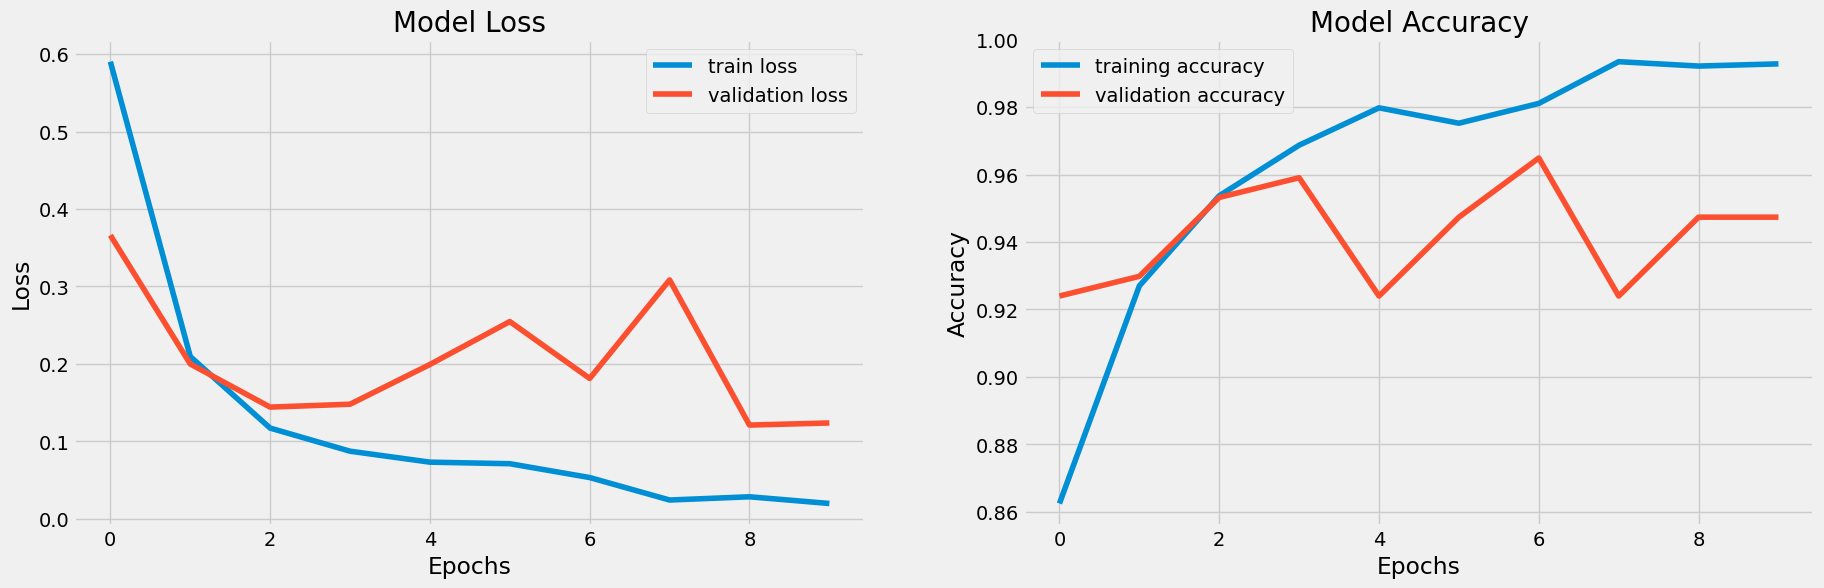

In [39]:
#Plotting Graph of Lstm model Training, Loss and Accuracy
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

In [2]:
!pip install torch


In [4]:
!pip install torch torchvision torchaudio


In [34]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam

def create_hybrid_model(input_dim, hidden_dim, output_dim):
    """
    Create a Hybrid Model combining Dense (GNN-like) layer and GRU for EEG classification.
    """

    # Input layer (Shape: (batch_size, features))
    inputs = layers.Input(shape=(input_dim,))  # Shape: (batch_size, features)

    # Spatial learning with Dense layer (simulating GNN)
    spatial = layers.Dense(hidden_dim, activation='relu')(inputs)

    # Reshaping input for the GRU layer (1 time step per feature)
    reshaped = layers.Reshape((1, hidden_dim))(spatial)  # Shape: (batch_size, 1, hidden_dim)

    # Temporal learning with GRU (captures time dependencies)
    gru = layers.GRU(256, return_sequences=True)(reshaped)
    gru_output = layers.Flatten()(gru)  # Flatten the output after GRU

    # Output layer (Softmax activation for 3 classes: Negative, Neutral, Positive)
    output = layers.Dense(output_dim, activation='softmax')(gru_output)

    # Create the model
    model = Model(inputs=inputs, outputs=output)

    # Compile the model with optimizer and loss function
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Example input dimensions (based on the previous code you used)
input_dim = 2548  # Number of features after PCA
hidden_dim = 64  # Number of hidden units in Dense layer
output_dim = 3  # 3 classes (Negative, Neutral, Positive)

# Create and summarize the model
model = create_hybrid_model(input_dim, hidden_dim, output_dim)
model.summary()

# Train the model
# Assuming X_train and y_train are ready and y_train is one-hot encoded
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 2548)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         163,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_5 (Reshape)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 1, 256)              │         247,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,203 (1.57 MB)

 Trainable params: 411,203 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8178 - loss: 0.4982 - val_accuracy: 0.9091 - val_loss: 0.2586
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9302 - loss: 0.1601 - val_accuracy: 0.9296 - val_loss: 0.1679
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9634 - loss: 0.0997 - val_accuracy: 0.9355 - val_loss: 0.1283
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9796 - loss: 0.0514 - val_accuracy: 0.9589 - val_loss: 0.1045
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9880 - loss: 0.0343 - val_accuracy: 0.9619 - val_loss: 0.1386
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9951 - loss: 0.0129 - val_accuracy: 0.9795 - val_loss: 0.1165
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9873 - loss: 0.0310 - val_accuracy: 0.9765 - val_loss: 0.0991
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9765 - val_loss

In [39]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming X_test and y_test are your test dataset and labels
# If X_test and y_test are not prepared, you need to split the data first.
# Here, we assume you have X_test, y_test after splitting.

# Predict the labels for the test set
y_pred = model.predict(x_test)

# Since y_pred contains probabilities, we convert them to the class with the highest probability (e.g., class 0, 1, or 2)
y_pred_class = np.argmax(y_pred, axis=1)

# y_test is assumed to be one-hot encoded, so convert it back to class labels
y_test_class = np.argmax(y_test, axis=1)

# Get the classification report
report = classification_report(y_test_class, y_pred_class, target_names=["Negative", "Neutral", "Positive"])
print(report)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
              precision    recall  f1-score   support

    Negative       0.96      0.98      0.97       153
     Neutral       0.98      0.88      0.93       142
    Positive       0.93      1.00      0.96       132

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



In [38]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras import Model
from tensorflow.keras.layers import LayerNormalization, Dropout
from tensorflow.keras.layers import MultiHeadAttention

# Define the GAT-Transformer Hybrid Model
def create_gat_transformer_model(input_dim, hidden_dim, output_dim, num_heads=4, num_transformer_layers=3):
    # Input layer: Shape is (None, features), where features are the EEG data features
    inputs = Input(shape=(input_dim,))

    # Reshape the input to a (batch_size, features, 1) shape
    reshaped = Reshape((input_dim, 1))(inputs)  # Shape: (batch_size, features, 1)

    # GAT Layer (Spatial Learning): Graph Attention
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=hidden_dim)(reshaped, reshaped)
    attention = Dropout(0.2)(attention)
    attention = LayerNormalization()(attention)

    # Transformer Layer (Temporal Learning): Transformer Encoder
    for _ in range(num_transformer_layers):
        transformer = MultiHeadAttention(num_heads=num_heads, key_dim=hidden_dim)(attention, attention)
        transformer = Dropout(0.2)(transformer)
        transformer = LayerNormalization()(transformer)

    # Flatten the output of the Transformer layer
    flattened = Flatten()(transformer)

    # Fully connected output layer with softmax for multi-class classification (3 classes)
    outputs = Dense(output_dim, activation='softmax')(flattened)

    # Create and compile the model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define input dimensions and other hyperparameters
input_dim = 2548  # Number of features after preprocessing or PCA
hidden_dim = 64  # Number of hidden units in GAT and Transformer layers
output_dim = 3  # Number of output classes (e.g., positive, neutral, negative)

# Create the model
gat_transformer_model = create_gat_transformer_model(input_dim, hidden_dim, output_dim)

# Print the model summary
gat_transformer_model.summary()

# Train the model (assuming X_train and y_train are prepared and y_train is one-hot encoded)
gat_transformer_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 2548)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_9 (Reshape)       │ (None, 2548, 1)        │              0 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_12   │ (None, 2548, 1)        │          1,793 │ reshape_9[0][0],       │
│ (MultiHeadAttention)      │                        │                │ reshape_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_25 (Dropout)      │ (None, 2548, 1)        │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_12    │ (None, 2548, 1)        │              2 │ dropout_25[0][0]       │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_15   │ (None, 2548, 1)        │          1,793 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_31 (Dropout)      │ (None, 2548, 1)        │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_15    │ (None, 2548, 1)        │              2 │ dropout_31[0][0]       │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_7 (Flatten)       │ (None, 2548)           │              0 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 3)              │          7,647 │ flatten_7[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 11,237 (43.89 KB)

 Trainable params: 11,237 (43.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-38-e41175bdc600>", line 50, in <cell line: 50>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

Out of memory while trying to allocate 34749647440 bytes.
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_34313]